Dados baixados do https://www.kaggle.com/S%C3%ADrio-Libanes/covid19 dia 26/07/2021 e cópia salva no https://github.com/aureliowozhiak/COVID-19_Clinical-Data-to-assess-diagnosis/blob/main/dataset/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx

#### Importando bibliotecas

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

#### Carregando dados

In [16]:
dados = pd.read_excel('https://github.com/aureliowozhiak/COVID-19_Clinical-Data-to-assess-diagnosis/raw/main/dataset/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

#### Definindo funções

In [17]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais


def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

#### Limpando dados

In [18]:
dados_limpos = preenche_tabela(dados)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()

dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos.AGE_PERCENTIL = dados_limpos.AGE_PERCENTIL.astype("category").cat.codes

In [19]:
dados_limpos

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,5,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,9,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
382,1910,382,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


In [20]:
np.random.seed(73246)

x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

#### O Modelo DummyClassifier

DummyClassifier
accuracy_score: 0.5340909090909091
              precision    recall  f1-score   support

           0       0.53      1.00      0.70        47
           1       0.00      0.00      0.00        41

    accuracy                           0.53        88
   macro avg       0.27      0.50      0.35        88
weighted avg       0.29      0.53      0.37        88



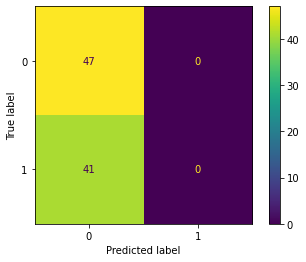

In [21]:
np.random.seed(73246)
modelo_DummyClassifier = DummyClassifier()
modelo_DummyClassifier.fit(x_train, y_train)

y_prediction_modelo_DummyClassifier = modelo_DummyClassifier.predict(x_test)
print("DummyClassifier\naccuracy_score:" , accuracy_score(y_test, y_prediction_modelo_DummyClassifier))

np.random.seed(73246)
plot_confusion_matrix(modelo_DummyClassifier, x_test, y_test)

np.random.seed(73246)
print(classification_report(y_test, y_prediction_modelo_DummyClassifier))

#### O Modelo LogisticRegression

LogisticRegression
accuracy_score: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        47
           1       0.68      0.61      0.64        41

    accuracy                           0.68        88
   macro avg       0.68      0.68      0.68        88
weighted avg       0.68      0.68      0.68        88



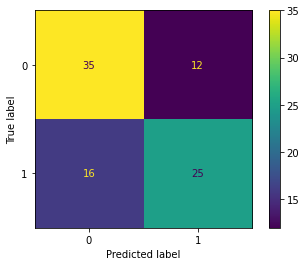

In [93]:
np.random.seed(73246)
modelo_LogisticRegression = LogisticRegression(max_iter=10000)
modelo_LogisticRegression.fit(x_train, y_train)

y_prediction_modelo_LogisticRegression = modelo_LogisticRegression.predict(x_test)
print("LogisticRegression\naccuracy_score:" , accuracy_score(y_test, y_prediction_modelo_LogisticRegression))

np.random.seed(73246)
plot_confusion_matrix(modelo_LogisticRegression, x_test, y_test)

np.random.seed(73246)
print(classification_report(y_test, y_prediction_modelo_LogisticRegression))

#### O Modelo DecisionTreeClassifier

DecisionTreeClassifier
accuracy_score: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        47
           1       0.62      0.56      0.59        41

    accuracy                           0.64        88
   macro avg       0.63      0.63      0.63        88
weighted avg       0.64      0.64      0.63        88



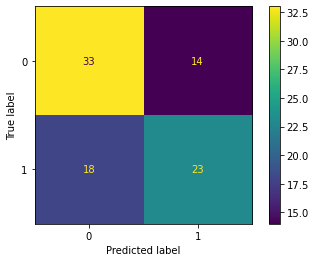

In [92]:
np.random.seed(73246)
modelo_DecisionTreeClassifier = DecisionTreeClassifier()
modelo_DecisionTreeClassifier.fit(x_train,y_train)

y_prediction_modelo_DecisionTreeClassifier = modelo_DecisionTreeClassifier.predict(x_test)
print("DecisionTreeClassifier\naccuracy_score:" , accuracy_score(y_test, y_prediction_modelo_DecisionTreeClassifier))

np.random.seed(73246)
plot_confusion_matrix(modelo_DecisionTreeClassifier, x_test, y_test)

np.random.seed(73246)
print(classification_report(y_test, y_prediction_modelo_DecisionTreeClassifier))